# HW2: Plotting & viz

due Tuesday Feb 8, 2021 @ 8pm

**submission instructions:**
make a new directory in your HW github repo
(e.g., `<yourname>_hw_2/`)

## Critique the most important figure from a seminal paper in your field

a) Embed (using `<img src= ...`) the original figure/caption along with a link to the original work. 

b) In your own words, what story is this figure trying to convey? What does it do well? What could have been done better? What elements didn't need to be present to still convey the same story?

## Reproduce one of your old published-paper quality plots with Bokeh or matplotlib.

a) Provide the original plot, the recreated Bokeh/matlibplot plot, and the Python code used to make the new plot.  You can ask us for an example from us if you don't have your own plots.

b) Add some (new) dynamic interactions to the plot--does it help tell your story better?

##  Volcano-induced Blastwave moving through California in 2022

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Shockwave_from_Hunga_Tonga_GOES_17.gif/440px-Shockwave_from_Hunga_Tonga_GOES_17.gif" width="30%">

The massive volcanic eruption near Tonga in the Pacific Ocean (20.550°S 175.385°W) occurred at 04:14:45 [UTC](https://en.wikipedia.org/wiki/Coordinated_Universal_Time) on 15 January 2022. The above animation (credit: Tim Schmit, NOAA/NESDIS/ASPB) shows propogation of the shockwave across the Earth as seen from space (using infrared measurements of water vapor). That shockwave was also measured as changing pressure in weather stations around the world. 

a) The CSV file `data/california_pressure_2022_01_15.csv` contains [Automated Surface Observing System (ASOS)](https://mesonet.agron.iastate.edu/ASOS/) pressure measurements at 64 stations in California taken several hours later that day, observed with 1-minute resolution. Read this data into a `pandas` DataFrame and then plot in the same figure the pressure as a function of time at SBA (Santa Barbara Municipal Airport, in Southern California), OAK (Oakland Airport, Bay Area), and MHS (Mount Shasta City, in Northern California). To allow a better visual comparison between the three, divide each plot by the initial value at the start of each of the timeseries. Overplot a 5-min thick vertical line for each timeseries (with the same color as the line) at the maximum of that series.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('data/california_pressure_2022_01_15.csv', parse_dates=[0])
df.head()

,valid(UTC),ACV,BFL,DAG,BIH,BLU,BLH,BUR,CMA,CRQ,...,SMX,SMO,STS,TVL,SCK,TRM,UKI,VCB,VNY,WVI
0,2022-01-15 09:00:00,29.970,29.653,28.226,26.172,24.978,29.744,29.327,30.020,29.730,...,29.842,29.894,30.050,24.090,30.195,30.287,29.536,30.115,29.241,30.002
1,2022-01-15 09:01:00,29.969,29.654,28.226,26.172,24.978,29.743,29.328,30.020,29.730,...,29.842,29.894,30.050,24.090,30.197,30.287,29.536,30.116,29.241,30.002
2,2022-01-15 09:02:00,29.969,29.654,28.227,26.172,24.978,29.743,29.328,30.021,29.731,...,29.842,29.894,30.050,24.091,30.197,30.287,29.535,30.117,29.240,30.002
3,2022-01-15 09:03:00,29.969,29.654,28.227,26.175,24.977,29.744,29.327,30.020,29.730,...,29.842,29.894,30.051,24.091,30.195,30.288,29.535,30.117,29.240,30.002
4,2022-01-15 09:04:00,29.969,29.655,28.228,26.174,24.977,29.745,29.327,30.019,29.731,...,29.841,29.894,30.049,24.090,30.195,30.288,29.534,30.118,29.240,30.002


In [3]:
df.rename(columns={'valid(UTC)': 'time'}, inplace=True)

In [39]:
def findmax(station, color):
    maxi = df['time'][df[station] == np.max(df[station])].iloc[0]
    max_l = maxi - timedelta(minutes=2.5)
    max_r = maxi + timedelta(minutes=2.5)
    ax.axvspan(max_l, max_r, alpha=0.3, color=color)

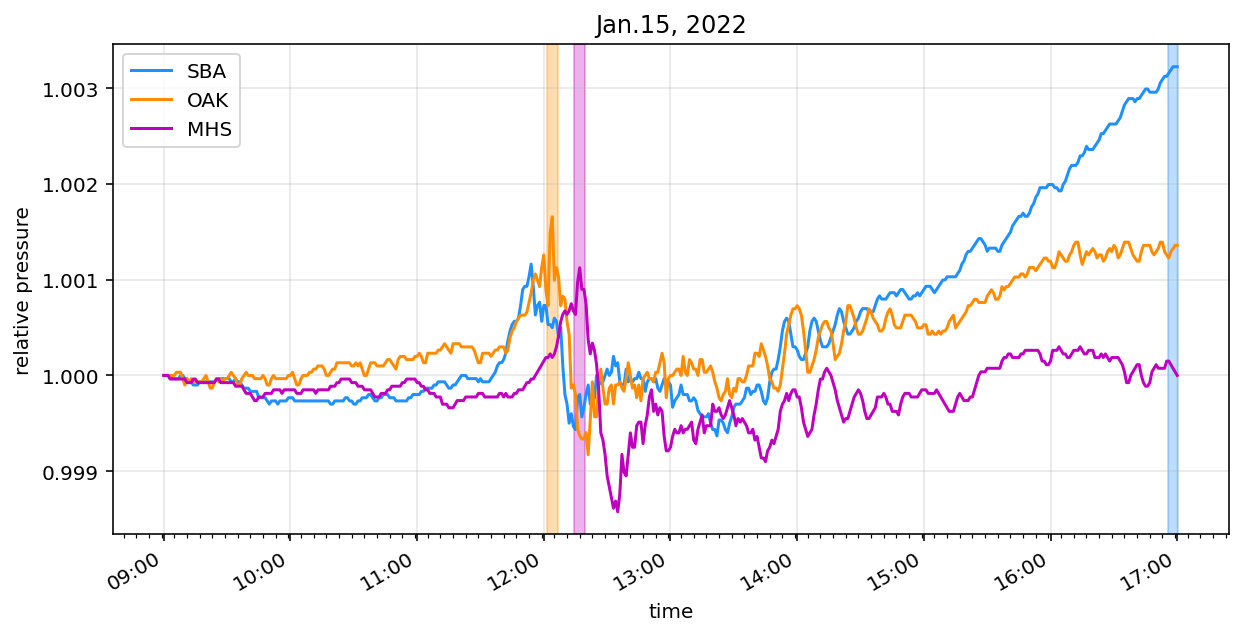

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df['time'], df['SBA']/df['SBA'][0], label='SBA', color='dodgerblue')
ax.plot(df['time'], df['OAK']/df['OAK'][0], label='OAK', color='darkorange')
ax.plot(df['time'], df['MHS']/df['MHS'][0], label='MHS', color='m')

findmax('SBA', 'dodgerblue')
findmax('OAK', 'darkorange')
findmax('MHS', 'm')

ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=6))
ax.set_xlabel('time')
ax.set_ylabel('relative pressure')
plt.gcf().autofmt_xdate() # Rotation
plt.legend()
plt.grid(alpha=0.3)
plt.title('Jan.15, 2022')
plt.show()

b) What can you say about the similarity or dissimilarity of the three series? Why argument can you make that the similarities are due to the Tongan shockwave and not other effects? What do you notice about the location of the maximum of the three series?

c) On a map of California, create a static vizualization of the timelag of the passage of the shockwave through the 64 stations in California. You might find it helpful to detect significant changes at each station using rolling percent changes on ~5-10 minute intervals (cf. [`.pct_change(periods=...)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) in pandas). The file `data/ca_asos.csv` contains the latitude and longitude of the stations. 

d) Pick one station and determine when you believe the shockwave first passed through that station. Using this information and the time of the explosion determine the speed of the shockwave. How does this compare to the speed of sound in air?

**EXTRA CREDIT**  Produce an animation of passage of the shockwave through California using this dataset. Hint: take at look at `matplotlib.animation.FuncAnimation`.